Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 8, 8, 128)         7385

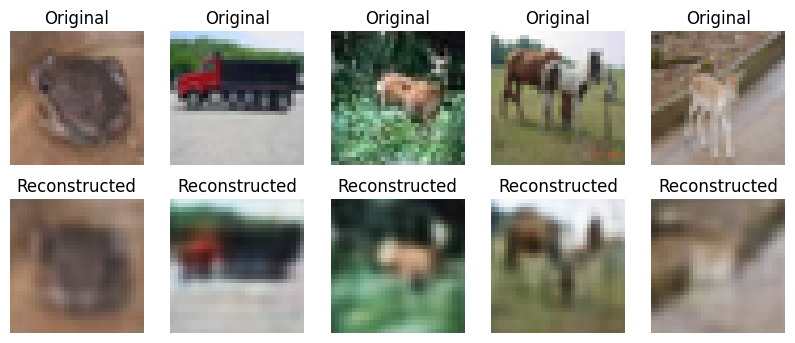

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import numpy as np

# Task 1: Load CIFAR10 dataset using TensorFlow API
(x_train, _), (x_test, _) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Task 2: Create model
input_img = tf.keras.Input(shape=(32, 32, 3))

# Encoder
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)

# Decoder
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

model = tf.keras.Model(input_img, decoded)

# Task 3: Print model summary and plot
model.summary()
plot_model(model, to_file='model.png', show_shapes=True)

# Task 4: Train and test the model
model.compile(optimizer='adam', loss='mse')
model.fit(x_train, x_train, epochs=10, batch_size=128, shuffle=True, validation_data=(x_test, x_test))

# Task 5: Compare validation loss
val_loss = model.evaluate(x_test, x_test, verbose=0)
print(f"Validation Loss: {val_loss}")

# Task 6: Compare at least five random images for CIFAR10 test dataset
num_images = 5
random_indices = np.random.choice(len(x_test), num_images, replace=False)
decoded_images = model.predict(x_test[random_indices])

# Plot original and reconstructed images
plt.figure(figsize=(10, 4))
for i in range(num_images):
    plt.subplot(2, num_images, i + 1)
    plt.imshow(x_test[random_indices[i]])
    plt.title("Original")
    plt.axis('off')

    plt.subplot(2, num_images, i + 1 + num_images)
    plt.imshow(decoded_images[i])
    plt.title("Reconstructed")
    plt.axis('off')

plt.show()